### Importamos el primer fichero que teníamos sobre vacunas

In [1]:
import pandas as pd
def _load_vaccination_data_df():
        # File containing the population for each country
        # Note: this file contains only countries population, not regions
        #TODO Hay que cambiar toda la estructura de datos si se quiere usar otro dataset
        vaccination_df = pd.read_csv("https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations.csv?raw=true",
                        parse_dates=['date'],
                        usecols=['location', 'date', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'])
        vaccination_df.rename(columns={'location' : 'GeoID', 
                                       'date': 'Date',
                                       'people_vaccinated_per_hundred': 'VaccinationsPerHundred',
                                       'people_fully_vaccinated_per_hundred': 'FullVaccinationsPerHundred'}, 
                              inplace=True)

        country_mapping_list = {'GeoID': { 'England' : 'United Kingdom / England',
                    'Northern Ireland' : 'United Kingdom / Northern Ireland', 
                    'Scotland' : 'United Kingdom / Scotland',
                    'Wales' : 'United Kingdom / Wales', 
                    'Kyrgyzstan' : 'Kyrgyz Republic', 
                    'Timor' : 'Timor-Leste',
                    'Slovakia' : 'Slovak Republic', 
                    'Czechia' : 'Czech Republic' } }
        vaccination_df.replace(to_replace=country_mapping_list, inplace=True)
        return vaccination_df
vac = _load_vaccination_data_df()

In [2]:
print("Columnas: ", vac.columns)
print("Filas: ", vac.shape[0])
print("Paises: ", vac.GeoID.unique().shape[0])
print("Rango de las fechas: ", vac.Date.min(), " - ", vac.Date.max())

Columnas:  Index(['GeoID', 'Date', 'VaccinationsPerHundred',
       'FullVaccinationsPerHundred'],
      dtype='object')
Filas:  165112
Paises:  235
Rango de las fechas:  2020-12-02 00:00:00  -  2023-04-16 00:00:00


In [3]:
import pandas as pd
def _load_vaccination_per_model_data_df():
        vaccination_df = pd.read_csv("https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations-by-manufacturer.csv?raw=true")
        return vaccination_df
vac_per_manu_factor = _load_vaccination_per_model_data_df()

In [4]:
print("Columnas: ", vac_per_manu_factor.columns)
print("Filas: ", vac_per_manu_factor.shape[0])
print("Paises: ", vac_per_manu_factor.location.unique().shape[0])
print("Rango de las fechas: ", vac_per_manu_factor.date.min(), " - ", vac_per_manu_factor.date.max())
print("Fabricantes: ", vac_per_manu_factor.vaccine.unique())
print("Lista de paises: ", vac_per_manu_factor.location.unique())

Columnas:  Index(['location', 'date', 'vaccine', 'total_vaccinations'], dtype='object')
Filas:  58974
Paises:  44
Rango de las fechas:  2020-12-04  -  2023-04-16
Fabricantes:  ['Oxford/AstraZeneca' 'Sinopharm/Beijing' 'Sputnik V' 'Pfizer/BioNTech'
 'Moderna' 'CanSino' 'Sputnik Light' 'Johnson&Johnson' 'Novavax'
 'Sanofi/GSK' 'Valneva' 'Medicago' 'Sinovac' 'Covaxin' 'SKYCovione']
Lista de paises:  ['Argentina' 'Austria' 'Belgium' 'Bulgaria' 'Canada' 'Chile' 'Croatia'
 'Cyprus' 'Czechia' 'Denmark' 'Ecuador' 'Estonia' 'Finland' 'France'
 'Germany' 'Hong Kong' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan'
 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Malta' 'Nepal'
 'Netherlands' 'Norway' 'Peru' 'Poland' 'Portugal' 'Romania' 'Slovakia'
 'Slovenia' 'South Africa' 'South Korea' 'Spain' 'Sweden' 'Switzerland'
 'Ukraine' 'United States' 'Uruguay' 'European Union']


In [5]:
# vamos a ver los datos del 25 de enero de 2021
fecha = '2021-01-25'
# Obtenemos los datos de vacunación por fabricante
jan_manu_factor = vac_per_manu_factor[vac_per_manu_factor.date == fecha]
# Obtenemos los datos de vacunación por país
jan_vac = vac[vac.Date == fecha]
pop = pd.read_csv("https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_nat_latest.csv")

In [6]:
print(jan_manu_factor)
print(jan_vac)

             location        date             vaccine  total_vaccinations
66          Argentina  2021-01-25  Oxford/AstraZeneca                  37
67          Argentina  2021-01-25           Sputnik V              317421
5720            Chile  2021-01-25     Pfizer/BioNTech               66793
8042          Czechia  2021-01-25             Moderna                6544
8043          Czechia  2021-01-25     Pfizer/BioNTech              215506
11650         Ecuador  2021-01-25     Pfizer/BioNTech                5116
13568          France  2021-01-25             Moderna               31691
13569          France  2021-01-25     Pfizer/BioNTech             1193430
16820         Germany  2021-01-25             Moderna               32636
16821         Germany  2021-01-25  Oxford/AstraZeneca                 134
16822         Germany  2021-01-25     Pfizer/BioNTech             1959844
23041           Italy  2021-01-25             Moderna               19189
23042           Italy  2021-01-25     

In [8]:
# Let's use spain
jan_vac_spain = jan_vac[jan_vac.GeoID == 'Spain']
jan_manu_factor_spain = jan_manu_factor[jan_manu_factor.location == 'Spain']
print(jan_vac_spain)
print(jan_manu_factor_spain)

        GeoID       Date  VaccinationsPerHundred  FullVaccinationsPerHundred
138917  Spain 2021-01-25                    2.45                        0.26
Empty DataFrame
Columns: [location, date, vaccine, total_vaccinations]
Index: []


In [11]:
# recorrer los paises y ver si tienen la columna de vaccine vacia
for pais in jan_manu_factor_spain.location.unique():
    vac_pais = jan_manu_factor_spain[jan_manu_factor_spain.location == pais]
    if vac_pais.vaccine.isnull().values.any():
        print("El pais ", pais, " tiene vacunas vacias")

In [20]:
# Let's take a look at spanish data
spain = vac_per_manu_factor[vac_per_manu_factor.location == "Spain"]
print("----------------------------------------------------------------")
# Let's get vacs from the vaccine moderna
spain_moderna = spain[spain.vaccine == "Moderna"]
print(spain_moderna.head())
print("----------------------------------------------------------------")
# Let's get vacs from the vaccine pfizer/biontech
spain_pfizer = spain[spain.vaccine == "Pfizer/BioNTech"]
print(spain_pfizer.head())
print("----------------------------------------------------------------")
# Let's get vacs from the vaccine sinopharm
spain_sinopharm = spain[spain.vaccine == "Oxford/AstraZeneca"]
print(spain_sinopharm.head())
print("----------------------------------------------------------------")


----------------------------------------------------------------
      location        date  vaccine  total_vaccinations
42289    Spain  2021-01-08  Moderna                   0
42292    Spain  2021-01-15  Moderna                7270
42294    Spain  2021-01-22  Moderna               25724
42296    Spain  2021-01-29  Moderna               29626
42298    Spain  2021-02-05  Moderna               49899
----------------------------------------------------------------
      location        date          vaccine  total_vaccinations
42291    Spain  2021-01-08  Pfizer/BioNTech              420080
42293    Spain  2021-01-15  Pfizer/BioNTech              921812
42295    Spain  2021-01-22  Pfizer/BioNTech             1244893
42297    Spain  2021-01-29  Pfizer/BioNTech             1617030
42299    Spain  2021-02-05  Pfizer/BioNTech             2116778
----------------------------------------------------------------
      location        date             vaccine  total_vaccinations
42290    Spain  20

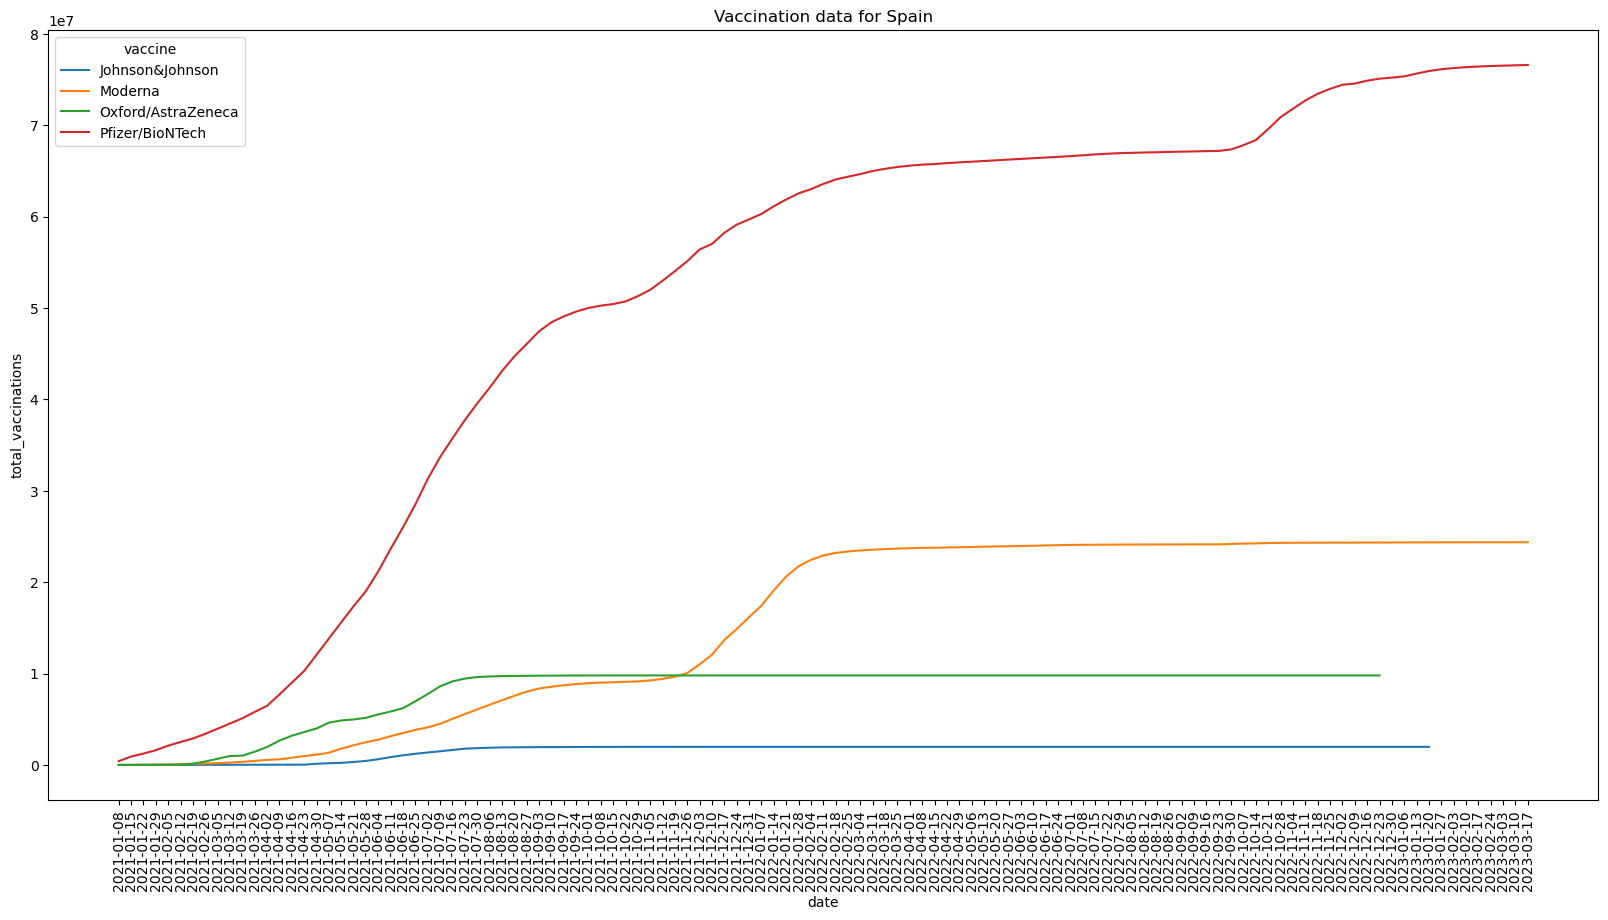

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Let's plot the vaccination data for Spain
plt.figure(figsize=(20,10))
plt.title("Vaccination data for Spain")
sns.lineplot(data=spain, x="date", y="total_vaccinations", hue="vaccine")
# Rotate the xticks
plt.xticks(rotation=90)
plt.show()

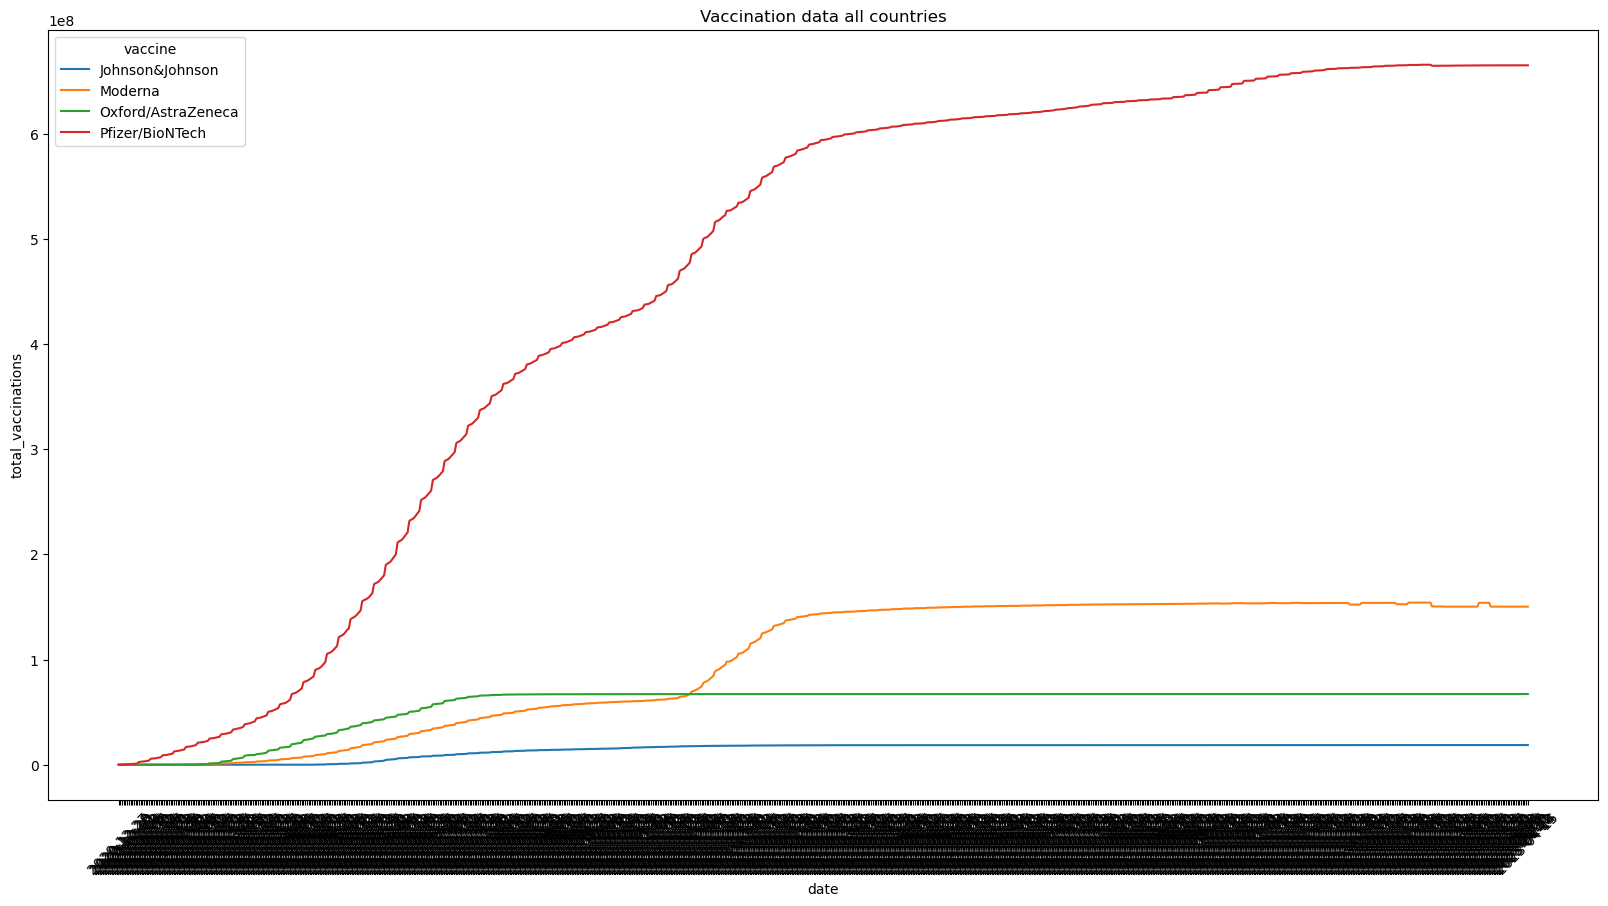

In [35]:
# Let's plot the data of vac_per_manu_factor
eu_data = vac_per_manu_factor[vac_per_manu_factor.location == "European Union"]
# Select only the vaccines we are interested in: pzifer, moderna, sinopharm, janssen in pandas
eu_data_vaccines = ["Johnson&Johnson", "Moderna", "Oxford/AstraZeneca", "Pfizer/BioNTech"]
eu_data = eu_data[eu_data.vaccine.isin(eu_data_vaccines)]
plt.figure(figsize=(20,10))
plt.title("Vaccination data all countries")
sns.lineplot(data=eu_data, x="date", y="total_vaccinations", hue="vaccine")
# Rotate the xticks
plt.xticks(rotation=45)
plt.show()

In [36]:
# print the number of vaccines of astrazeneca in united kingdom
print("Number of vaccines of astrazeneca in united kingdom: ", vac_per_manu_factor[(vac_per_manu_factor.location == "United Kingdom") & (vac_per_manu_factor.vaccine == "Oxford/AstraZeneca")].total_vaccinations.sum())

Number of vaccines of astrazeneca in united kingdom:  0


In [22]:
import pandas as pd
def _load_vaccination_per_age_data_df():
        vaccination_df = pd.read_csv("https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations-by-age-group.csv?raw=true")
        return vaccination_df
vac_per_age = _load_vaccination_per_age_data_df()

In [23]:
print("Columnas: ", vac_per_age.columns)
print("Filas: ", vac_per_age.shape[0])
print("Paises: ", vac_per_age.location.unique().shape[0])
print("Rango de las fechas: ", vac_per_age.date.min(), " - ", vac_per_age.date.max())

Columnas:  Index(['location', 'date', 'age_group', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred',
       'people_with_booster_per_hundred'],
      dtype='object')
Filas:  60472
Paises:  38
Rango de las fechas:  2020-01-01  -  2023-04-16
